# DDPG Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Start the environment! Before running the code cell below, change the file_name parameter to match the location of the Unity environment that you downloaded as an ABSOLUTE path. The Reacher environment is included in this repo, so, just referring to the file name is enough.

env = UnityEnvironment(file_name="Reacher.app")

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train the agent with ddpg

In [5]:
from collections import deque
import matplotlib.pyplot as plt
from ddpg_agent import Agent
import torch

%matplotlib inline

Initialising ReplayBuffer
Episode 1	Score: 0.00	Average Score: 0.00.00
Episode 2	Score: 0.00	Average Score: 0.00.00
Episode 3	Score: 0.28	Average Score: 0.09.28
Episode 4	Score: 0.46	Average Score: 0.18.46
Episode 5	Score: 0.11	Average Score: 0.17.11
Episode 6	Score: 0.24	Average Score: 0.18.24
Episode 7	Score: 0.71	Average Score: 0.26.71
Episode 8	Score: 0.68	Average Score: 0.31.68
Episode 9	Score: 0.89	Average Score: 0.37.89
Episode 10	Score: 0.72	Average Score: 0.4172
Episode 11	Score: 0.26	Average Score: 0.4026
Episode 12	Score: 0.74	Average Score: 0.4274
Episode 13	Score: 0.27	Average Score: 0.4127
Episode 14	Score: 0.98	Average Score: 0.4598
Episode 15	Score: 0.88	Average Score: 0.4888
Episode 16	Score: 0.38	Average Score: 0.4738
Episode 17	Score: 0.82	Average Score: 0.5082
Episode 18	Score: 1.91	Average Score: 0.5791
Episode 19	Score: 0.58	Average Score: 0.5758
Episode 20	Score: 0.96	Average Score: 0.5996
Episode 21	Score: 1.84	Average Score: 0.6584
Episode 22	Score: 1.07	Averag

Episode 180	Score: 5.95	Average Score: 6.995
Episode 181	Score: 10.73	Average Score: 7.07.73
Episode 182	Score: 9.35	Average Score: 7.135
Episode 183	Score: 12.37	Average Score: 7.17.37
Episode 184	Score: 14.79	Average Score: 7.25.79
Episode 185	Score: 12.05	Average Score: 7.36.05
Episode 186	Score: 12.78	Average Score: 7.44.78
Episode 187	Score: 19.60	Average Score: 7.62.60
Episode 188	Score: 16.34	Average Score: 7.78.34
Episode 189	Score: 9.22	Average Score: 7.792
Episode 190	Score: 14.34	Average Score: 7.89.34
Episode 191	Score: 10.92	Average Score: 7.97.92
Episode 192	Score: 9.31	Average Score: 8.001
Episode 193	Score: 10.12	Average Score: 8.04.12
Episode 194	Score: 10.32	Average Score: 8.12.32
Episode 195	Score: 9.19	Average Score: 8.189
Episode 196	Score: 17.75	Average Score: 8.31.75
Episode 197	Score: 19.35	Average Score: 8.47.35
Episode 198	Score: 16.48	Average Score: 8.60.48
Episode 199	Score: 15.36	Average Score: 8.73.36
Episode 200	Score: 20.34	Average Score: 8.89.34
Episode

Episode 350	Score: 35.62	Average Score: 30.1062

Environment solved in 250 episodes!	Average Score: 30.10


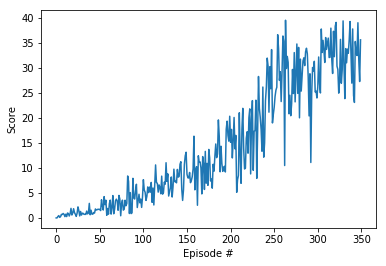

In [6]:
def ddpg(n_episodes=1000, max_t=1000):
    """ Deep Deterministic Policy Gradients
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        data (dict): contains all variables, so you can 
                     happily continue your training where it were left
    """
    
    scores_window = deque(maxlen=100)
    scores = np.zeros(num_agents)
    scores_episode = []

    agents =[] 

    for i in range(num_agents):
        agents.append(Agent(state_size, action_size, random_seed=0))
  
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        for agent in agents:
            agent.reset()
            
        scores = np.zeros(num_agents)
            
        for t in range(max_t):
            actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])
            env_info = env.step(actions)[brain_name]        
            next_states = env_info.vector_observations    
            rewards = env_info.rewards                     
            dones = env_info.local_done        
            
            for i in range(num_agents):
                agents[i].step(t,states[i], actions[i], rewards[i], next_states[i], dones[i]) 
 
            states = next_states
            scores += rewards
            if t % 20:
                print('\rTimestep {}\tScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
                      .format(t, np.mean(scores), np.min(scores), np.max(scores)), end="") 
            if np.any(dones):
                break 
        score = np.mean(scores)
        scores_window.append(score)      
        scores_episode.append(score)

        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="\n")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(Agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(Agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return {"scores_episode": scores_episode,
            "scores_window": scores_window,
            "scores" : scores,
            "agents": agents
            }

_data = ddpg()
scores = _data["scores_episode"]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()